In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


past_cr = 101
remaining_cr = 56
curr_gpa = 4.04
#grad_cr = np.asarray([x + past_cr + remaining_cr for x in curr_cr])

#DOMAINS
curr_cr = np.asarray([i for i in [0, 3, 4, 6, 7, 9, 10, 12, 13, 16]])
this_sem_gpa = np.arange(3,4.)
fut_gpa = np.arange(3,4.25,0.25)

In [2]:
#CONVERT TO 2D MATRICES
#z = np.outer(fut_gpa.T, fut_gpa)
x,y,z = np.meshgrid(curr_cr, this_sem_gpa, fut_gpa)

col = (past_cr * curr_gpa + x * y + remaining_cr * z) / (past_cr + x + remaining_cr)
flat_col = col.flatten()
flat_x = x.flatten()
flat_y = y.flatten()
flat_z = z.flatten()

minn, maxx = flat_col.min(), flat_col.max()
norm = plt.Normalize(3.8, maxx)
# colors = plt.cm.jet(norm(flat_col))
m = plt.cm.ScalarMappable(norm = norm, cmap="jet")
m.set_array([])
fcolors = m.to_rgba(flat_col)

#FOURTH DIMENSION - COLORMAP
#create colormap according to c-value 
# color_dimension = col
# minn, maxx = color_dimension.min(), color_dimension.max()
# norm = mpl.colors.Normalize(minn, maxx)
# colors = plt.cm.jet(norm(col))
# m.set_array([])
# print(type(m))
# fcolors = m.to_rgba(color_dimension)


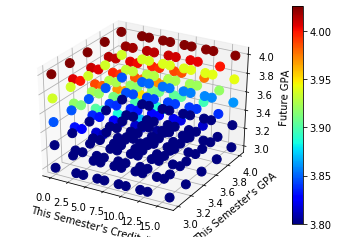

In [3]:
#PLOT
fig = plt.figure()
ax = fig.gca(projection="3d")
sc = ax.scatter3D(flat_x, flat_y, flat_z, c= fcolors, s=80, depthshade= False)
ax.set_xlabel("This Semester's Credit #")
ax.set_ylabel("This Semester's GPA")
ax.set_zlabel("Future GPA")
plt.colorbar(m)

In [4]:
max_elements = []
max_sem_cred = []
max_this_sem_gpa = []
for k in range(np.size(col,2)):
    for i in range(np.size(col,0)):
        maxim = 0
        dum_semestr_gpa = 0
        dum_sem_cred = 0
        for j in range(np.size(col,1)):
            if (maxim < col[i][j][k]):
                maxim = col[i][j][k] 
                dum_sem_cred = x[i][j][k] 
                dum_semestr_gpa = y[i][j][k]
    
    max_elements.append(maxim)
    max_sem_cred.append(dum_sem_cred)
    max_this_sem_gpa.append(dum_semestr_gpa)

for x in range(len(fut_gpa)):
    print(f"""Max Final GPA is {max_elements[x]} for This Semester 
      {max_sem_cred[x]} Credits, Future {fut_gpa[x]} GPA and 
      Semester with {max_this_sem_gpa[x]} GPA.""")
        

Max Final GPA is 3.699653179190751 for This Semester 
      16 Credits, Future 3.0 GPA and 
      Semester with 4.0.
Max Final GPA is 3.7805780346820805 for This Semester 
      16 Credits, Future 3.25 GPA and 
      Semester with 4.0.
Max Final GPA is 3.8615028901734103 for This Semester 
      16 Credits, Future 3.5 GPA and 
      Semester with 4.0.
Max Final GPA is 3.9424277456647396 for This Semester 
      16 Credits, Future 3.75 GPA and 
      Semester with 4.0.
Max Final GPA is 4.025732484076433 for This Semester 
      0 Credits, Future 4.0 GPA and 
      Semester with 4.0.


In [5]:
# print(x[3][1])
# print(y[3][1])
# printi
# a = (past_cr * curr_gpa + x[3][1][1] * y[3][1][1] + 
#      remaining_cr * z[3][1][1]) / (past_cr + x[3][1][1] + remaining_cr)
# print(a)
# print(col[3][1][1])
print(z[0][1][1])

3.25
